In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [14]:
df.replace({'species':
            {'setosa':1, 'versicolor':2, 'virginica':3}},
           inplace = True)

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [16]:
df.species.value_counts()

1    50
2    50
3    50
Name: species, dtype: int64

In [18]:
x = df.drop('species', axis=1)
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                   test_size = 0.2,
                                                    random_state = 23)

In [24]:

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 42, 40]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 42, 40]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.048\nsamples = 41\nvalue = [0, 40, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.25, 0.21428571428571427, 'x[2] <= 5.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 

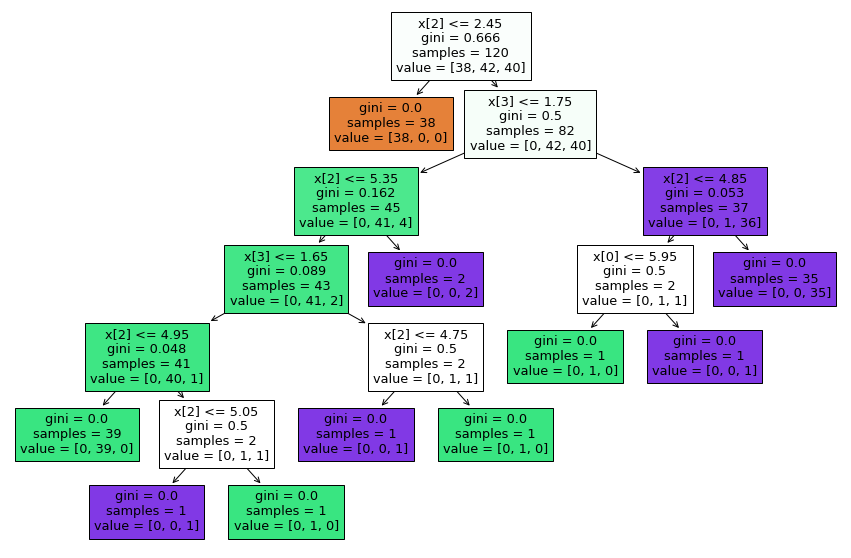

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

plt.figure(figsize = (15,10));

tree.plot_tree(model, filled = True )



Based on above figure, we figured out that, fig can be cut at max_depth of 3 as we can see the pure nodes

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [38, 42, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 82\nvalue = [0, 42, 40]'),
 Text(0.25, 0.375, 'x[2] <= 5.35\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'),
 Text(0.125, 0.125, 'gini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

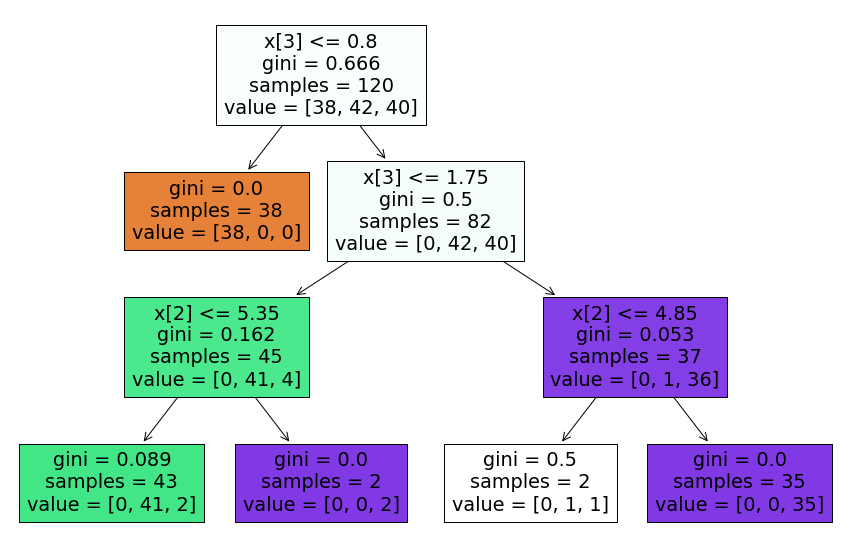

In [29]:
model = DecisionTreeClassifier(max_depth=3)

model.fit(x_train, y_train)

plt.figure(figsize = (15,10));

tree.plot_tree(model, filled = True )

In [30]:
y_preds = model.predict(x_test)
y_preds

array([3, 3, 2, 1, 3, 2, 1, 3, 1, 2, 2, 1, 3, 1, 1, 2, 2, 2, 3, 1, 3, 1,
       1, 1, 3, 1, 1, 2, 2, 2], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
accuracy_score(y_test, y_preds)

0.9333333333333333

In [33]:
print(confusion_matrix(y_test, y_preds))

[[12  0  0]
 [ 0  8  0]
 [ 0  2  8]]


In [38]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.80      1.00      0.89         8
           3       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.95      0.93      0.93        30

